<h5>목차</h5>
<ol>
    <li><a href=#1>Practice Project: Insurance Cost Analysis</a></li>
    <li><a href=#2>Final Project Scenario</a></li>
    <li><a href=#3></a></li>
</ol>

<a id=1></a>
# **Practice Project: Insurance Cost Analysis**

 **보험 데이터베이스 분석 프로젝트**  

## **데이터 설명**  
이 프로젝트에서는 아래 **보험 데이터베이스**의 매개변수를 활용하여 분석을 수행합니다.  

| **매개변수** | **설명** | **데이터 타입** |  
|---|----|---|  
| **age** | 나이 (년) | 정수 (integer) |  
| **gender** | 성별 (남성: 1, 여성: 2) | 정수 (integer) |  
| **bmi** | 체질량지수(BMI) | 실수 (float) |  
| **no_of_children** | 자녀 수 | 정수 (integer) |  
| **smoker** | 흡연 여부 (비흡연: 0, 흡연: 1) | 정수 (integer) |  
| **region** | 거주 지역 (NW: 1, NE: 2, SW: 3, SE: 4) | 정수 (integer) |  
| **charges** | 연간 보험료 (USD) | 실수 (float) |  

---

## **목표 (Objectives)**  
이 프로젝트에서 수행할 작업:  

✅ **`pandas` 데이터프레임**으로 데이터를 로드하기  
✅ 누락된 데이터 확인 및 **데이터 정리** 수행  
✅ **탐색적 데이터 분석(EDA)** 을 통해 `charges` 에 가장 큰 영향을 미치는 속성 식별  
✅ **단변량 및 다변량 선형 회귀 모델**을 개발하여 보험료(`charges`) 예측  
✅ **Ridge 회귀**를 활용하여 선형 회귀 모델의 성능 개선  

## Setup

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

## Task 1 : Import the dataset

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [3]:
import os
from urllib.request import urlretrieve

name = filepath.split('/')[-1]

# Downlad csv file if not exists
if not os.path.isfile(name):
    urlretrieve(filepath, name)
else:
    print(f"{name} is already existed")

medical_insurance_dataset.csv is already existed


In [4]:
# Read csv

df = pd.read_csv(name, header = None)  # header = None으로 설정해 숫자 header 생성

In [5]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [6]:
# 결측치 '?' 제거
df.replace('?',np.nan, inplace = True)

## Task 2 : Data Wrangling

In [7]:
# 결측치 여부 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [9]:
# age의 결측치를 평균 값으로 적용
df['age'].replace(np.nan, df['age'].astype(float).mean(), inplace = True)

In [10]:
# categorical attributes('smoker)의 결측치는 빈도가 가장 높은 것으로 대체
df['smoker'].replace(np.nan, df.smoker.value_counts().idxmax(), inplace = True)

In [11]:
# age 와 smoker 열의 데이터속성을 object -> int으로 변경
df[['age','smoker']] = df[['age','smoker']].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


In [13]:
# 'charges' 열의 값을 소수점 2자리

df['charges'] = np.round(df['charges'],2)

In [14]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## Task 3 : Exploratory Data Analysis (EDA)

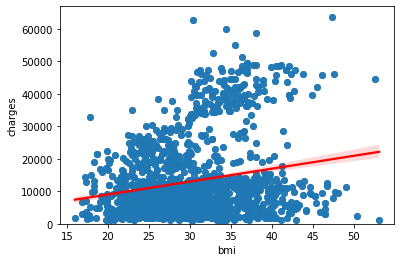

In [16]:
# bmi에 따른 charges의 회귀 그래프(regression plot) 를 구현

sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0,)
plt.show()

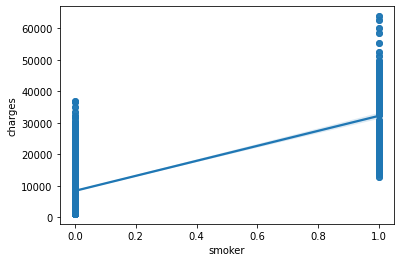

In [22]:
# 'smoker'에 따른 'charges' 회귀 그래프
sns.regplot(x='smoker', y='charges', data=df);

In [23]:
# correlation matrix

df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


## Task 4 : Model Development

In [25]:
# 'smoker' 속성만을 사용해 선형회귀모델을 적합

X = df[['smoker']]
y = df['charges']
lr = LinearRegression()
lr.fit(X,y)

# R^2 값 계산
lr.score(X,y)

0.6221791733924185

In [35]:
# 다른 모든 속성으로 선형회귀모델을 적합하고 R^2 값을 비교. (목적: 성능개선 기회를 살펴봄)

Z = df[[col for col in df.columns if col != 'charges']]
y = df['charges']
lm = LinearRegression()
lm.fit(Z,y)

lm.score(Z,y)

0.7504083820289634

In [41]:
#  `StandardScaler()`, `PolynomialFeatures()`,`LinearRegression()`로 훈련 Pipeline 생성
# 목적: 이전모델과 성능을 비교해 개선 여부 확인

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),  # 상수항 제거
    ('model', LinearRegression())
])
Z = Z.astype(float)

pipeline.fit(Z, y)
y_pred = pipeline.predict(Z)
print(r2_score(y, y_pred))

0.8452091092904718


## Task 5 : Model Refinement

전체 데이터의 20%를 테스트 데이터로 나머지를 훈련 데이터로 분할. : `train_test_split()`사용

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=1)

**Ridge 회귀 모델**을 초기화하고 훈련 데이터에 적합(fit)

✅ **해야 할 작업:**  
1. **Ridge 회귀 모델**을 생성하고 적절한 **하이퍼파라미터(α 값)** 설정: 여기서는 0.1
2. **훈련 데이터**를 사용하여 모델 학습  
3. **테스트 데이터의 R² 점수** 출력  

<div class='alert alert-block alert-info'>
    <b>Ridge 회귀는</b> 선형회귀의 업그레이드 버전으로, <b>과적합 (Overfit)</b>을 방지하는 역할을 함.
</div>

In [43]:
# Ridge 회귀 모델 초기화 (α=0.1)
ridge_model = Ridge(alpha = 0.1)

# 모델 학습 (훈련 데이터에 적합)
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# R² 점수 계산
r2 = r2_score(y_test, y_pred)

r2

0.6760807731582401

**다항 변환(Polynomial Transformation)**을 적용한 후 **Ridge 회귀 모델**을 다시 훈련하세요.  

✅ **해야 할 작업:**  
1. **다항 특성 변환**: `degree=2`로 설정하여 훈련 데이터의 특성을 확장  
2. **Ridge 회귀 모델 훈련**: 변환된 데이터를 사용하여 모델 학습  
3. **테스트 데이터의 R² 점수 출력**: 변환 전 모델과 비교하여 성능 개선 여부 확인  

In [49]:
# 다항 변환 (degree=2)
pr = PolynomialFeatures(degree=2)

# 훈련 데이터만 `fit_transform()`, 테스트데이터는 `transform()` 사용
## 테스트 데이터는 훈련 데이터에서 배운 규칙을 그대로 따라해야하므로 `fit()`하면 안됨
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.transform(X_test)

# Ridge 모델 다시 초기화 (alpha = 0.1 사용)
ridge_model = Ridge(alpha = 0.1)

# 모델 학습
ridge_model.fit(x_train_pr, y_train)

# 예측 수행
y_pred = ridge_model.predict(x_test_pr)

# 성능평가
r2 = r2_score(y_test, y_pred)
r2

0.7835631107608165

## Congratulations! You have completed this project

<a id=2></a>
# Final Project Scenario
# Lab for Final Project - Data Analytics for House Pricing Data Set

**부동산 데이터 분석 과제**  

### **과제 개요**  
당신은 **부동산 투자 신탁(Real Estate Investment Trust)**에서 근무하는 **데이터 분석가(Data Analyst)**입니다.  
회사는 **주거용 부동산**에 투자하고자 하며, 주어진 특성을 기반으로 **주택 시장 가격**을 예측하는 것이 목표입니다.  

### **분석 및 예측 대상**  
✅ **주택 가격** 예측  
✅ **사용할 특성(Features)**  
- 주거 면적(Square footage)  
- 침실 수(Number of bedrooms)  
- 층 수(Number of floors)  
- 기타 관련 부동산 특성  

### **해야 할 작업**  
1. **데이터 분석(EDA)**: 특성별 가격 변동 패턴 탐색  
2. **회귀 모델 개발**: 선형 회귀 및 고급 모델 활용  
3. **모델 성능 평가**: R² 점수 및 오차 분석  
4. **실험적 개선**: 다항 회귀, Ridge 회귀 등 적용  

💡 **힌트**: 제공된 **Jupyter Notebook 템플릿**을 활용하여 **10개의 질문**을 해결하세요. 🚀

## **데이터셋 개요**  

이 데이터셋은 **King County(킹 카운티, 시애틀 포함)**의 주택 판매 가격 정보를 포함하고 있습니다.  
- **판매 기간**: 2014년 5월 ~ 2015년 5월  
- **출처**: [Kaggle 데이터셋](https://www.kaggle.com/harlfoxem/housesalesprediction)  
- **사용 목적**: 본 과정에 맞게 일부 수정됨  

### **데이터 활용 목적**  
🏡 **King County 지역의 주택 가격 예측**  
📊 **부동산 시장 분석 및 트렌드 파악**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Module 1: Importing Data Sets


In [53]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [54]:
df = pd.read_csv(filepath)

In [56]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Module 2: Data Wrangling

In [61]:
# drop Unnamed: 0 and id by using `drop()`

df.drop(['id','Unnamed: 0'], axis=1, inplace=True)

In [62]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [63]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [64]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [65]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [66]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Module 3: Exploratory Data Analysis

In [75]:
unique_floors = df['floors'].value_counts().to_frame()
unique_floors.reset_index(inplace=True)
unique_floors.rename(columns={'index':'unique_floor','floors':'counts'}, inplace=True)
unique_floors

,unique_floor,counts
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


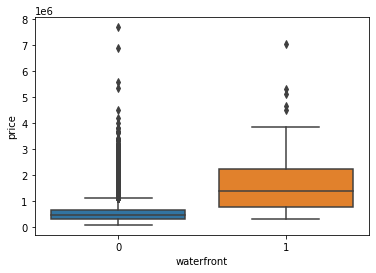

In [77]:
sns.boxplot(x='waterfront', y='price', data=df);

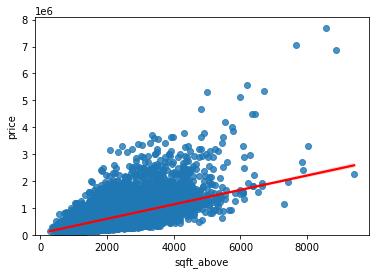

In [82]:
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color':'red'})
plt.ylim(0,);

In [83]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Module 4: Model Development

**경도(`long`)**를 사용하여 **선형 회귀 모델**을 적합(fit)하고 **R² 점수**를 계산하세요.  

✅ **해야 할 작업:**  
1. **독립 변수(X)**: `long`  
2. **종속 변수(Y)**: `price`  
3. **선형 회귀 모델 훈련**  
4. **테스트 데이터에서 R² 점수 출력**  

📌 **결과 해석:**  
- R² 값이 1에 가까울수록 `long`이 `price`를 잘 예측하는 것!  
- 값이 낮다면 `long`은 `price`와 상관관계가 적음 🚀

In [85]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.00046769430149007363

✅ **선형 회귀 모델을 적합(fit)**  
- **독립 변수(X)**: `sqft_living` (거주 면적)  
- **종속 변수(Y)**: `price` (주택 가격)  

✅ **R² 점수 계산 및 출력**  


In [86]:
X = df[['sqft_living']]
Y = df['price']
lr = LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)

0.4928532179037931

리스트에 있는 특성을 사용하여 `price`를 예측하는 선형 회귀 모델을 적합하세요.

In [89]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

그런 다음 R² 값을 계산하세요.  
코드와 R² 값을 스크린샷으로 저장한 후 최종 프로젝트에 제출하세요.

In [90]:
Z = df[features]
Y = df['price']
lr = LinearRegression()
lr.fit(Z, Y)
lr.score(Z, Y)

0.6576372970735713

다음과 같이 튜플 목록을 생성하세요:  



✅ **설명:**  
- `'scale'`: `StandardScaler()` - 데이터 표준화  
- `'polynomial'`: `PolynomialFeatures(include_bias=False)` - 다항 특성 변환  
- `'model'`: `LinearRegression()` - 선형 회귀 모델  
 

In [91]:
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]

✅ **해야 할 작업:**  
1. **튜플 리스트**를 사용하여 **파이프라인(Pipeline) 객체** 생성  
2. `features` 리스트의 특성을 사용하여 `price` 예측 모델 학습  
3. **R² 값 계산 및 출력**  
4. **코드 및 출력 결과 스크린샷 제출**  


In [92]:
pipe = Pipeline(Input)

X = df[features]
Y = df['price']

pipe.fit(X, Y)

r2 = pipe.score(X, Y)

r2

0.7508598253545078

## Module 5: Model Evaluation and Refinement

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


우리는 데이터를 **훈련 세트**와 **테스트 세트**로 분할할 것입니다.

In [94]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


---

✅ **해야 할 작업:**  
1. **Ridge 회귀 모델 생성** (`alpha=0.1` 설정)  
2. **훈련 데이터에 적합(fit)**  
3. **테스트 데이터에서 R² 값 계산 및 출력**  
4. **코드 및 출력 결과 스크린샷 제출**  


In [97]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, Y_train)

r2 = ridge_model.score(X_test, Y_test)

r2

0.6459152254891418

---

✅ **해야 할 작업:**  
1. **2차 다항 변환(Polynomial Transformation) 적용**  
   - 훈련 데이터 & 테스트 데이터에 대해 `degree=2` 설정  
2. **Ridge 회귀 모델 생성 및 학습** (`alpha=0.1`)  
3. **테스트 데이터에서 R² 점수 계산 및 출력**  
4. **코드 및 출력 결과 스크린샷 제출**  


In [98]:
pr = PolynomialFeatures(degree=2, include_bias=False)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.transform(X_test)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train_pr, Y_train)

r2 = ridge_model.score(X_test_pr, Y_test)

r2

0.754363374075094